In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sc
from numpy import pi
from scipy import signal

This notebook shows how to generate a single sideband modulation using the Hillbert transform. 

We begin by showing the PSD of some signal, m, with three signals with a relatively narrow bandwidth. 

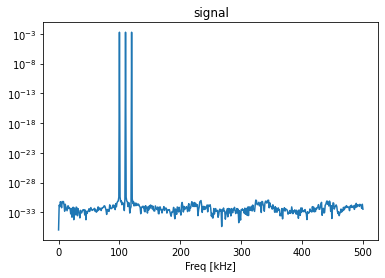

In [39]:
Fs=1e6
f1=1e5
f2=1.1e5
f3=1.2e5
t=np.arange(0,1e-3-1/Fs,1/Fs)
m=2*(np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)+np.sin(2*pi*f3*t))
f, Pxx_den = signal.periodogram(m, Fs)
plt.figure()
plt.semilogy(f/1e3, Pxx_den)
plt.xlabel('Freq [kHz]')
plt.title('signal')
plt.show()

We now perform a double sideband modulation as a reference. The signal is modulated at 250kHz. Note there are now two copies of the signal, at positive and negative offset to the modulation signal. 

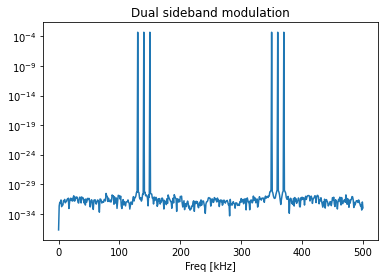

In [40]:
f0=250e3
dsb_m=m*np.cos(2*pi*f0*t)
f2, Pxx_den2 = signal.periodogram(dsb_m, Fs)
plt.figure()
plt.semilogy(f2/1e3, Pxx_den2)
plt.xlabel('Freq [kHz]')
plt.title('Dual sideband modulation')
plt.show()


The hillbert transform offsets the positive frequency components by 90 degrees. The resulting signal, mc, is called the analytically continued signal.

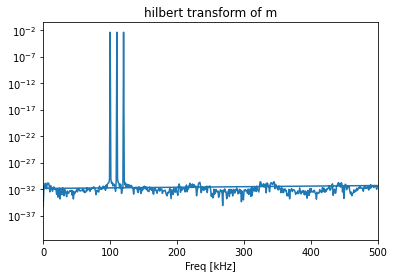

In [49]:
mc=signal.hilbert(m)
f3, Pxx_den3 = signal.periodogram(mc, Fs,return_onesided=False)
plt.figure()
plt.semilogy(f3/1e3, Pxx_den3)
plt.xlabel('Freq [kHz]')
plt.xlim([0,500])
plt.title('hilbert transform of m')
plt.show()

We now perform a single sideband modulation by calculating $Real(m_c*exp(2*pi*i*f0*t))$. notw how now we only have a single copy of our 3 tone signal

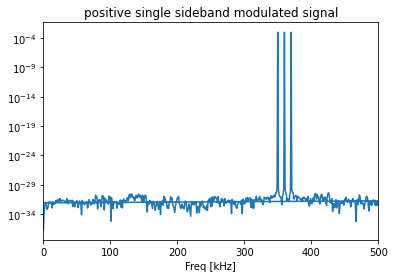

In [55]:
ssb_pos=np.real(mc)*np.cos(2*pi*f0*t)-np.imag(mc)*np.sin(2*pi*f0*t)
f4, Pxx_den4 = signal.periodogram(ssb_pos, Fs,return_onesided=False)
plt.figure()
plt.semilogy(f4/1e3, Pxx_den4)
plt.xlabel('Freq [kHz]')
plt.xlim([0,500])
plt.title('positive single sideband modulated signal')
plt.show()

The negative sideband is similarly obtained. 

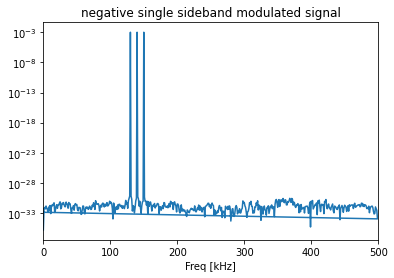

In [56]:
ssb_neg=np.real(mc)*np.cos(2*pi*f0*t)+np.imag(mc)*np.sin(2*pi*f0*t)
f5, Pxx_den5 = signal.periodogram(ssb_neg, Fs,return_onesided=False)
plt.figure()
plt.semilogy(f5/1e3, Pxx_den5)
plt.xlabel('Freq [kHz]')
plt.xlim([0,500])
plt.title('negative single sideband modulated signal')
plt.show()